## Observations and Insights 

In [96]:
%matplotlib notebook

In [97]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sp
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# Display the data table for preview
combined_data = pd.merge(mouse_metadata, study_results, how = "outer", on = "Mouse ID")
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [57]:
# Checking the number of mice 
combined_data_points = combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
combined_data_points

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

SUMMARY STATISTIC

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = pd.DataFrame(combined_data.groupby("Drug Regimen").count())

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_stats["Mean"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean())

summary_stats["Median"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median())

summary_stats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std())

summary_stats["Variance"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var())

summary_stats["SEM"] = pd.DataFrame(combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem())

summary_stats = summary_stats[["Mouse ID", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]

summary_stats = summary_stats.rename(columns = {"Mouse ID" : "Trials"})

summary_stats.head()

,Trials,Mean,Median,Standard Deviation,Variance,SEM
Drug Regimen,,,,,,
Capomulin,230,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,178,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,178,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,188,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,186,54.331565,52.509285,8.134708,66.173479,0.596466


## Bar and Pie Charts

<IPython.core.display.Javascript object>


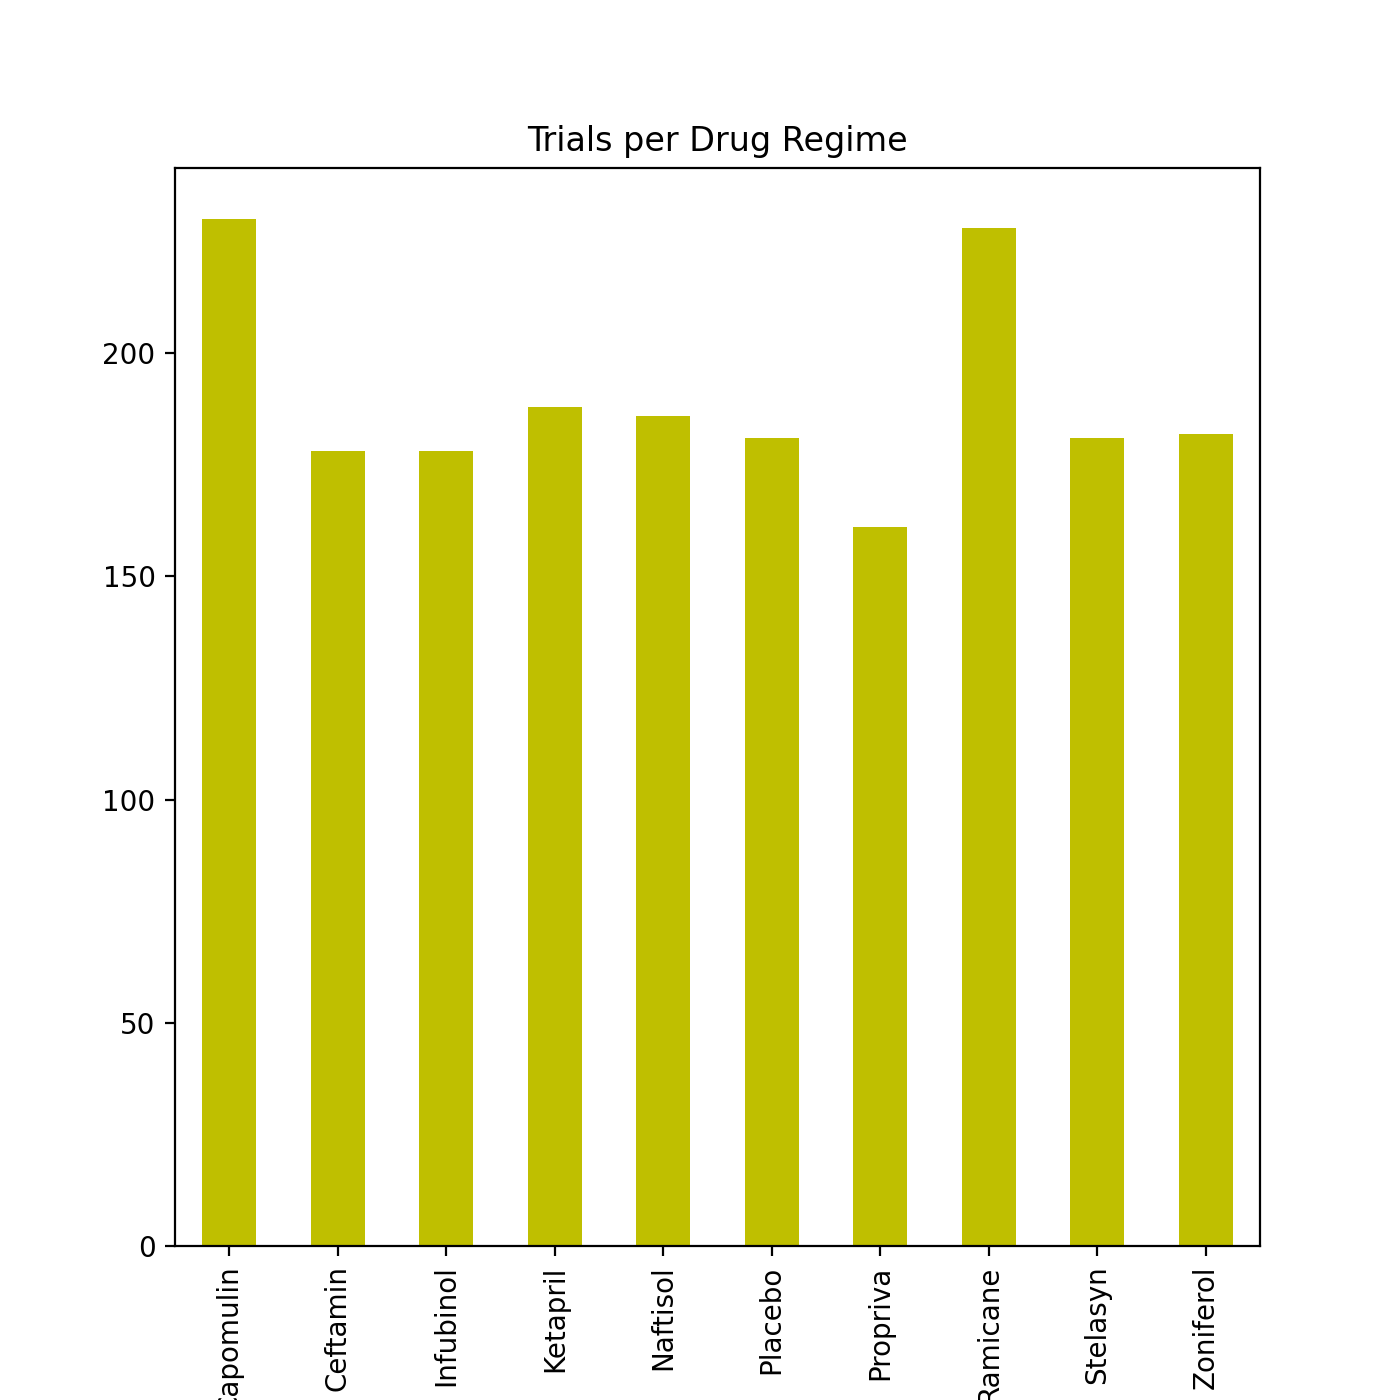

In [41]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
datapoints = summary_stats[["Trials"]]

# develope graph characteristics
datapoints.plot(
    kind="bar", 
    figsize=(7,7), 
    color = "y", 
    legend=False)

# Bar Chart Visual
plt.title("Trials per Drug Regime")
plt.show()

<IPython.core.display.Javascript object>


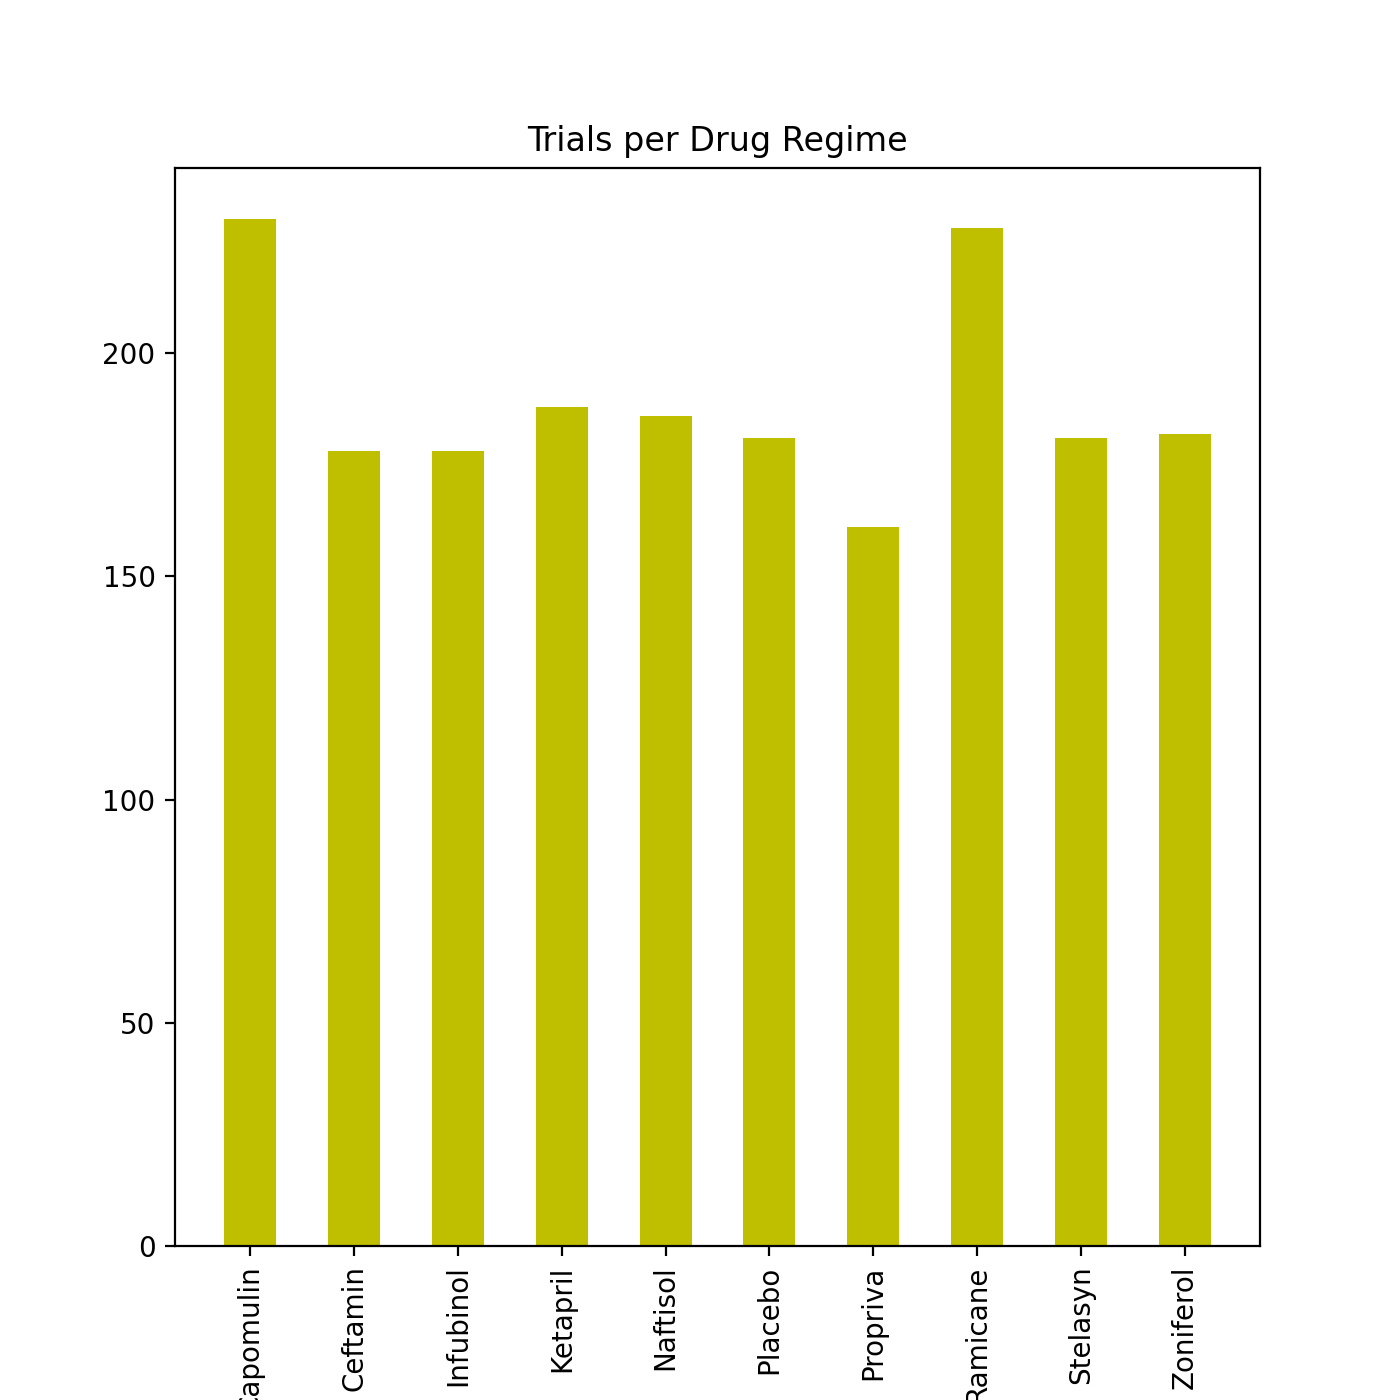

In [46]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Setting the axis
x_axis = np.arange(len(datapoints))
tick_locations = [value for value in x_axis]

# graph configurations 
plt.figure(figsize=(7,7))
plt.bar(x_axis, datapoints["Trials"], color = "y", width = .5)

plt.xticks(tick_locations, 
           datapoints.index.values, 
           rotation="vertical")

# Bar graph visual
plt.title("Trials per Drug Regime")
plt.xlabel("Drug Regime")
plt.show()

<IPython.core.display.Javascript object>


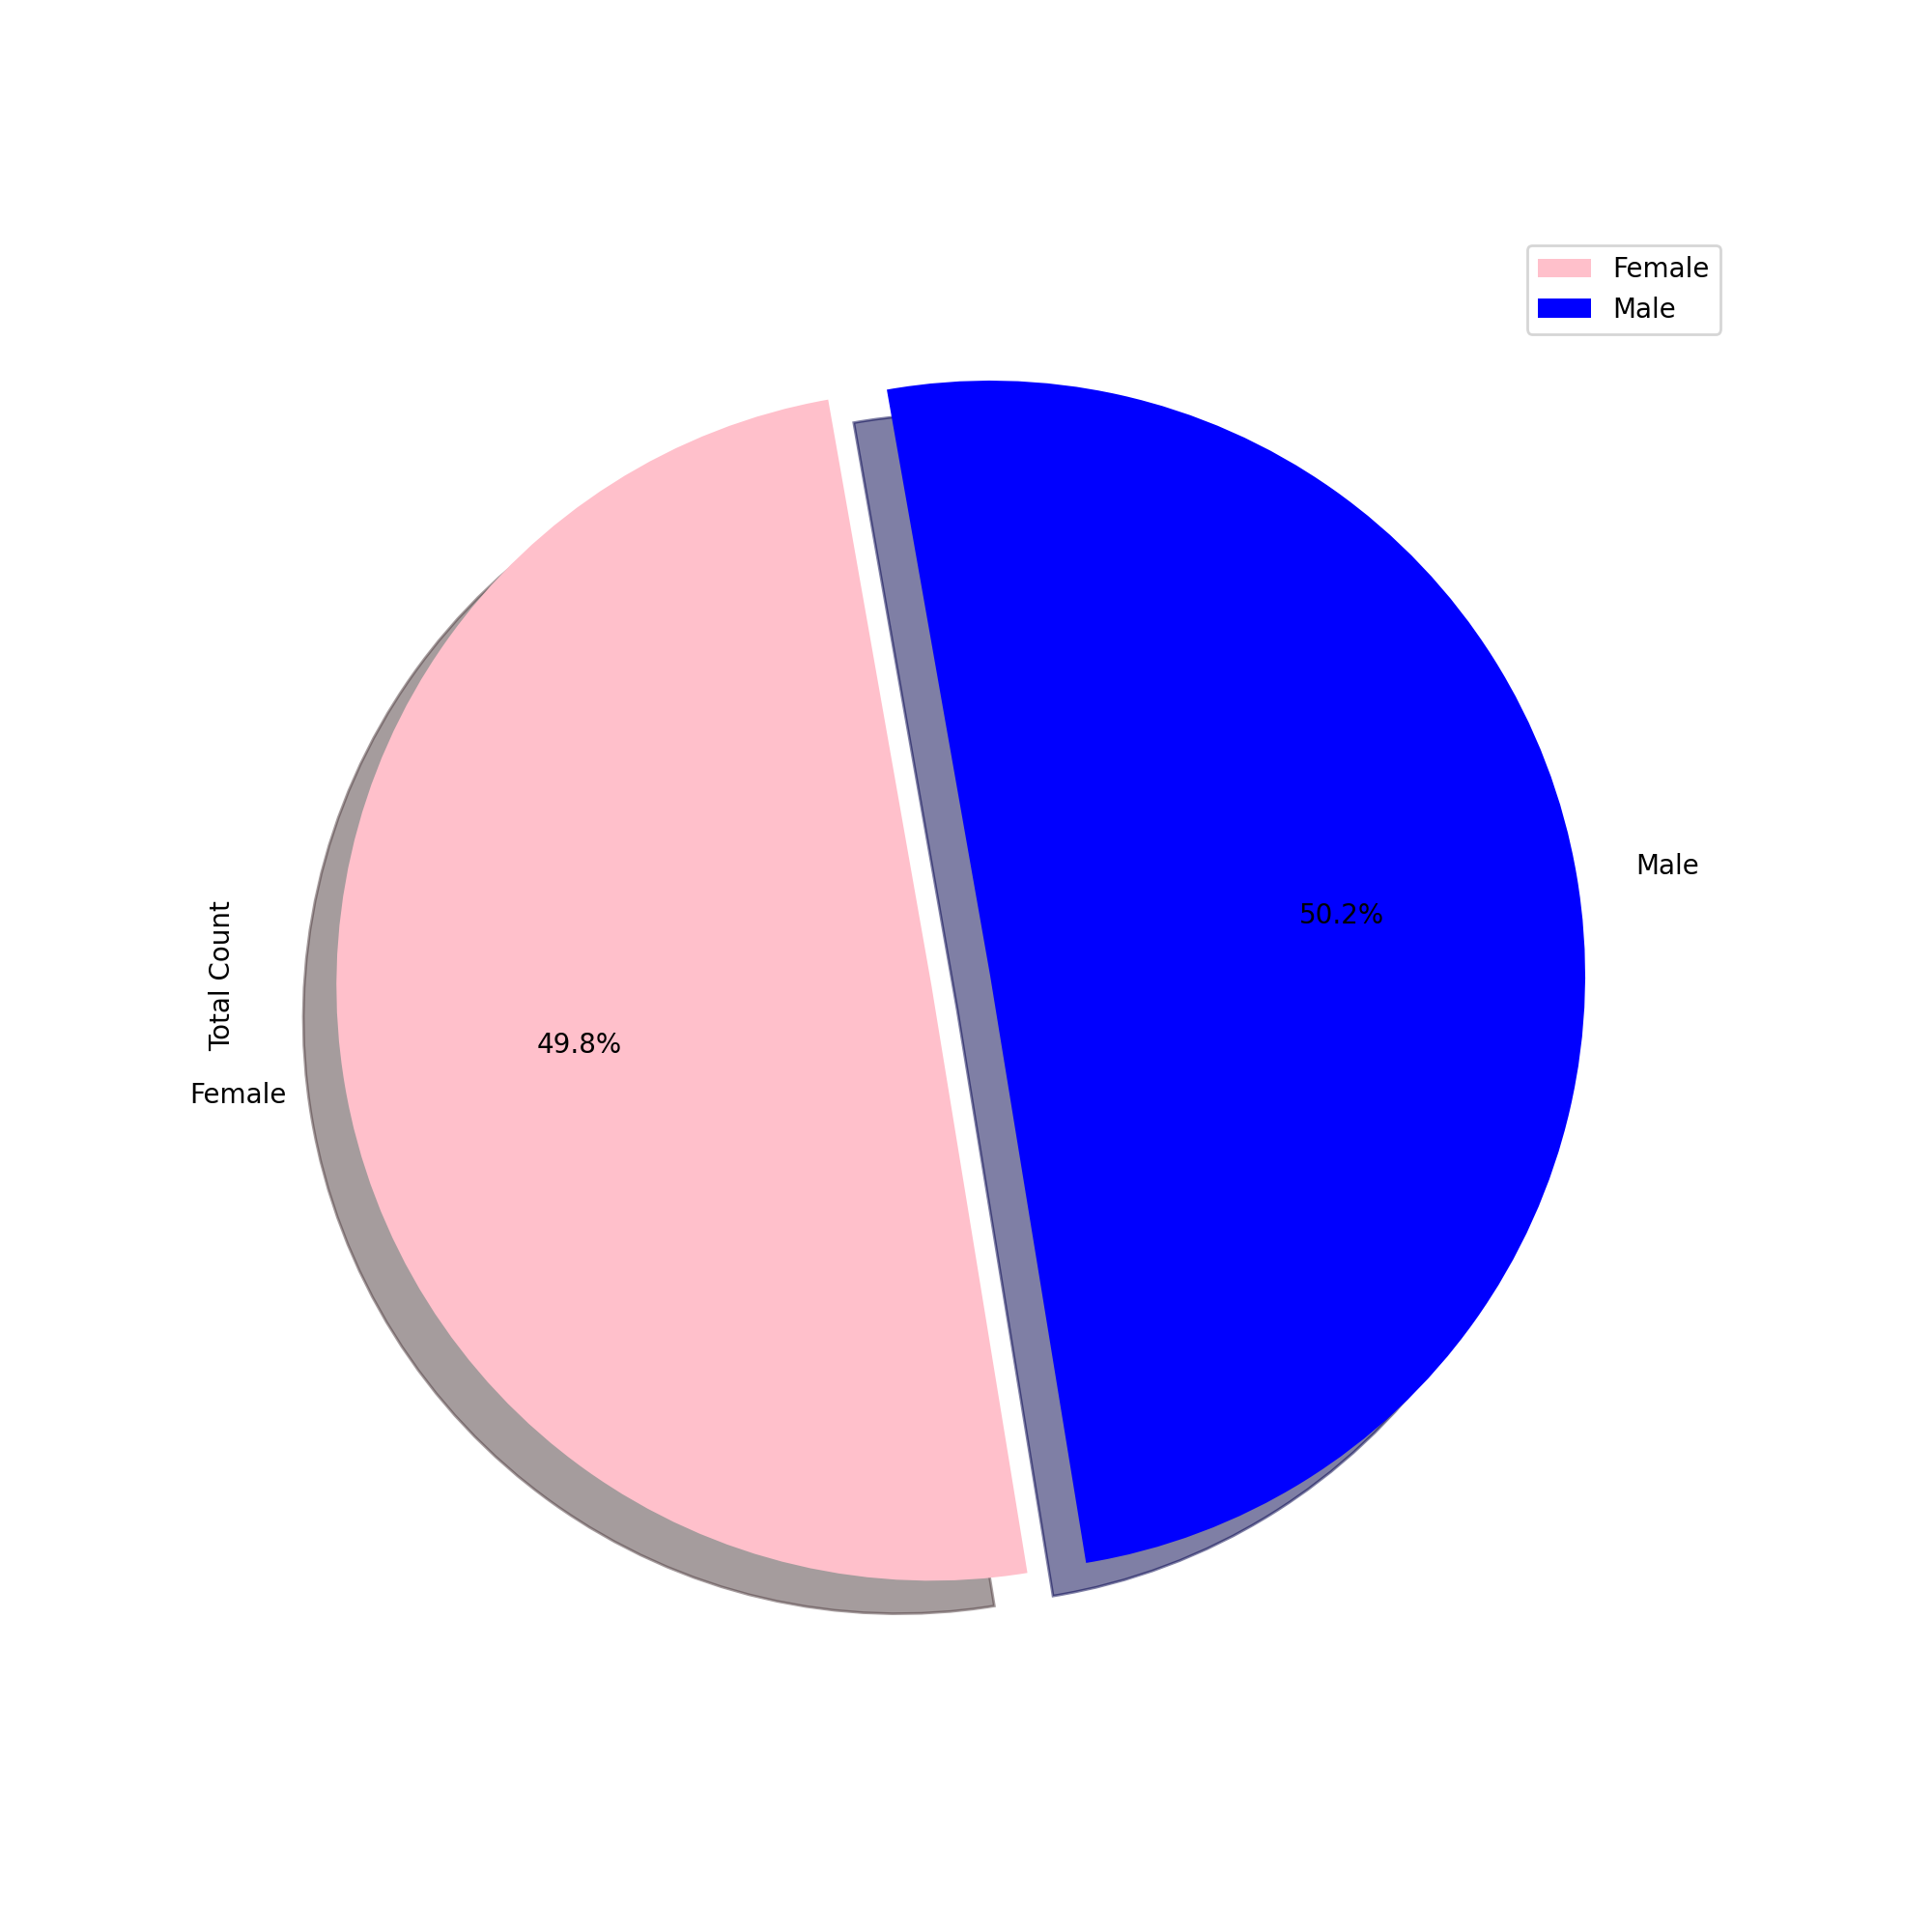

In [91]:
# Generate pie chart with pandas
#merge by genders 
group_by_gender = combined_data.groupby(["Mouse ID","Sex"])
group_by_gender

mice_gender_df = pd.DataFrame(group_by_gender.size())

mice_gender = pd.DataFrame(mice_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

#Calculating precentage formula for gender catagories for mice
mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))
mice_gender["Percentage of Sex"] = mice_gender["Percentage of Sex"]

#Pie Graph criteria
colors = ['pink', 'blue']
explode = (0.1, 0)
plot = mice_gender.plot.pie(y='Total Count',figsize=(5,5), colors = colors, startangle=100, explode = explode, shadow = True, autopct="%1.1f%%")

In [88]:
# Generate new pie chart with pyplot
# formating pie chart characteristics & values
labels = ["Female","Male"]
sizes = [49.8,50.2]
colors = ['pink', 'blue']
explode = (0.1, 0)

#Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=100)
plt.axis("equal")

(-1.2355127287132786,
 1.1147914614135397,
 -1.1489317066360893,
 1.110400087368662)

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

<IPython.core.display.Javascript object>


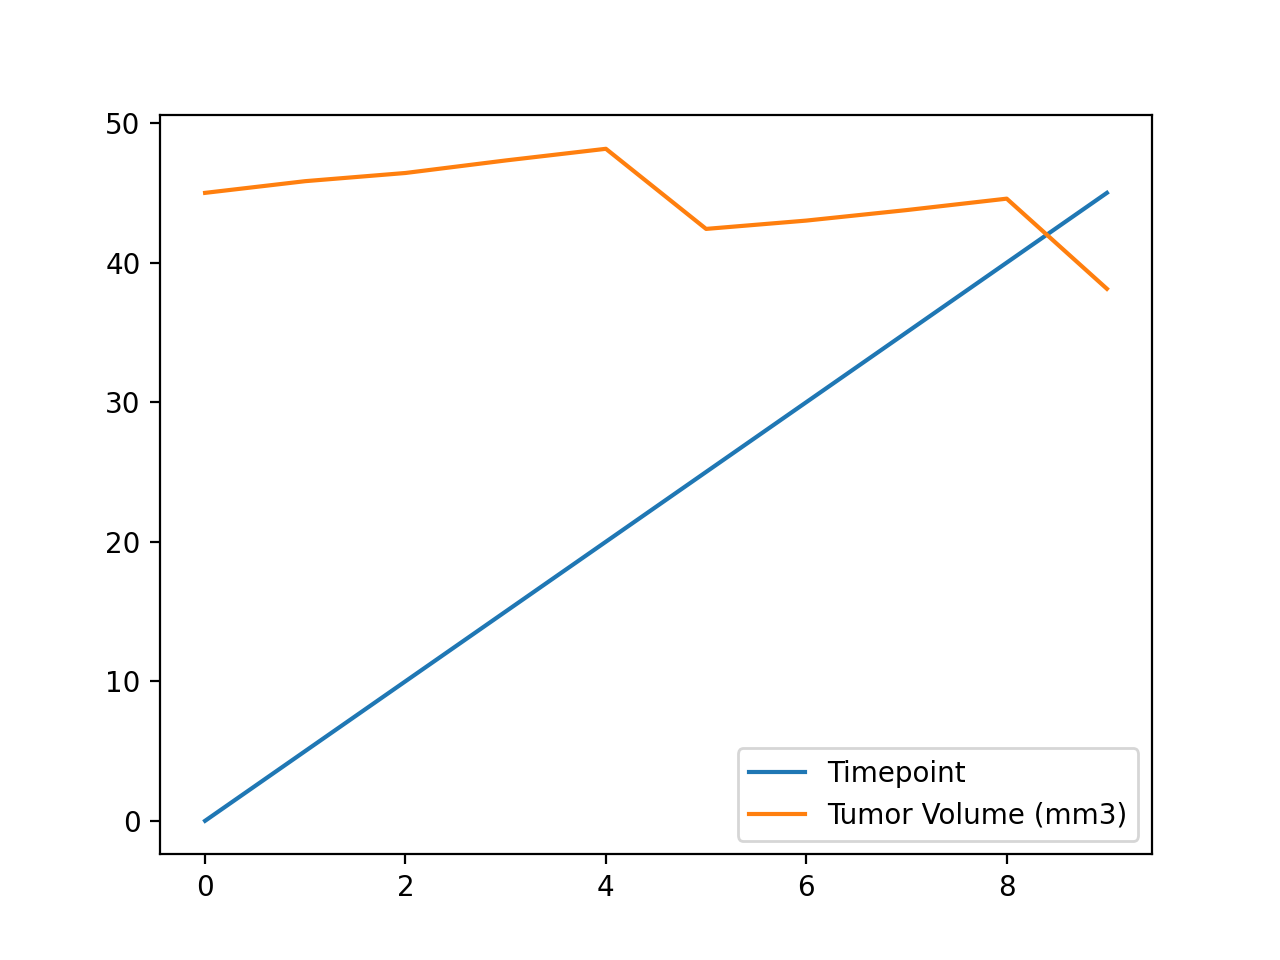

In [95]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
tumor_vs_time = combined_data[combined_data["Mouse ID"].isin(["j119"])]
tumor_vs_time

tumor_vs_time_data = tumor_vs_time[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_vs_time_data

line_plot_df = tumor_vs_time_data.reset_index()
line_plot_df

line_plot_finale = line_plot_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
line_plot_finale

lines = line_plot_finale.plot.line()

In [18]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
